In [399]:
import scipy.ndimage
import skimage.color
import skimage.io
import skimage.transform
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [400]:
def extrema_points(below,current,above,img_shape):
  h_size=img_shape[0]
  v_size=img_shape[1]

  extrema_points = np.zeros([h_size,v_size])
  extrema_count=0
  for i in range(1, h_size - 1):
        for j in range(1, v_size - 1):

          #current pixel in current scale(middle scale)
          curr=current[i,j]
          current_layer=[]    #current scale
          above_layer=[]      #previous scale
          below_layer=[]
          for p in range(i-1,i+2):
            for q in range(j-1,j+2):
              if(p!=i or q!=j):
                current_layer.append(current[p,q]) #collecting all current scale pixels
              above_layer.append(above[p,q])  #collecting all next scale pixels
              below_layer.append(below[p,q])   #collecting all previous scale pixels

          if(curr>max(current_layer) and curr>max(above_layer) and curr>max(below_layer)):   #incase of maxima
            extrema_points[i,j]=1
            extrema_count +=1
          elif(curr<min(current_layer) and curr<min(above_layer) and curr<min(below_layer)):    #incase of minima
            extrema_points[i,j]=1
            extrema_count +=1

  return extrema_points,extrema_count  #return extrema points and count of extrema points


In [401]:
def SIFT(image): 
  extrema_count=0
  sigma=1.6  
  number_of_gaussians=8 
  k=2 ** (1/(number_of_gaussians-1))

  gaussian_filters=[None]*number_of_gaussians
  Diff_of_gaussian = [None] * (number_of_gaussians-1)
  extrema_points_matrices = [None] * (number_of_gaussians - 3)

  for i in range(number_of_gaussians):    #creating gaussian filters
    scaled_sigma =sigma*(k**i)
    gaussian_filters[i]=scipy.ndimage.gaussian_filter(image,scaled_sigma) * 255
  
  
  for i in range(number_of_gaussians - 1):       #creating DOG'S
    Diff_of_gaussian[i] = gaussian_filters[i + 1] - gaussian_filters[i]
    
  
  for i in range(number_of_gaussians - 3):        #getting extreme points 
    extrema_points_matrices[i],extrema_points_count = extrema_points(Diff_of_gaussian[i].copy(), Diff_of_gaussian[i + 1].copy(), Diff_of_gaussian[i + 2].copy(), image.shape)
    extrema_count=extrema_count+extrema_points_count
  print("No.of features: ",end=' ')
  print(extrema_count)
  for i in range(number_of_gaussians - 3):
    image=image+extrema_points_matrices[i]
  fig = plt.figure(figsize=(10,10))
  plt.imshow(image, cmap='gray')  #plotting SIFT Image
  plt.show()
  
  


### **Original Image**

No.of features:  1056


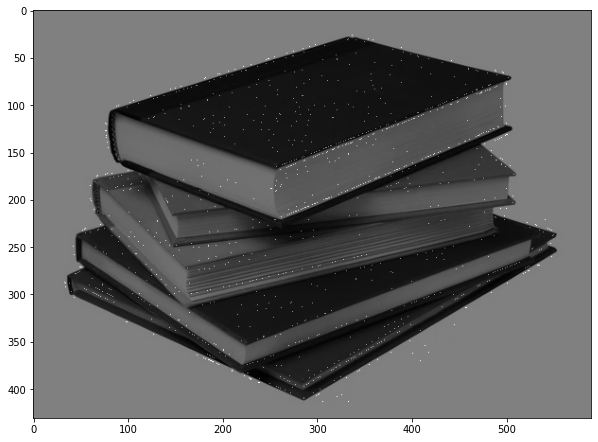

No.of features:  5415


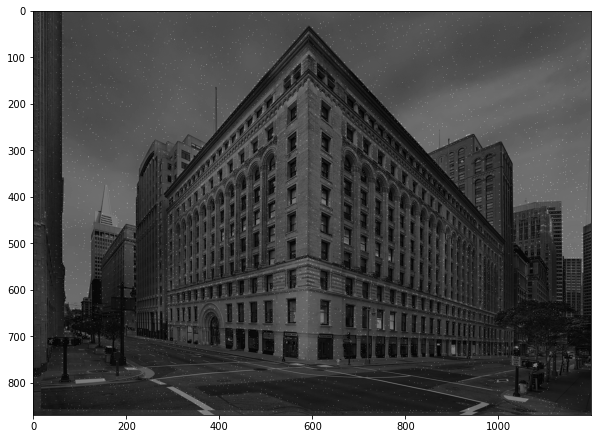

In [402]:
image_1 = skimage.color.rgb2gray(skimage.io.imread('books.png'))
image_2= skimage.color.rgb2gray(skimage.io.imread('building.png'))
SIFT(image_1)
SIFT(image_2)


### **Rotated Image**

No.of features:  1521


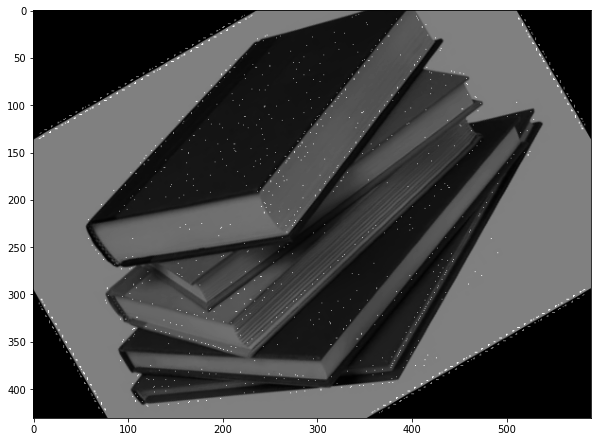

No.of features:  5731


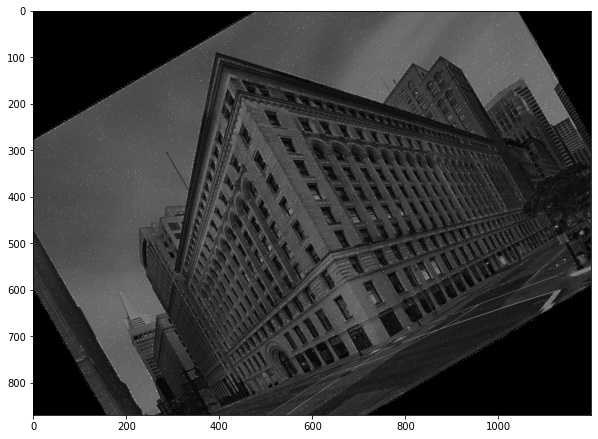

No.of features:  1057


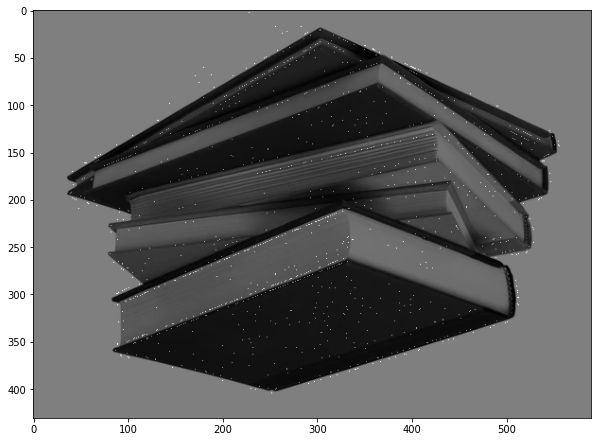

No.of features:  5415


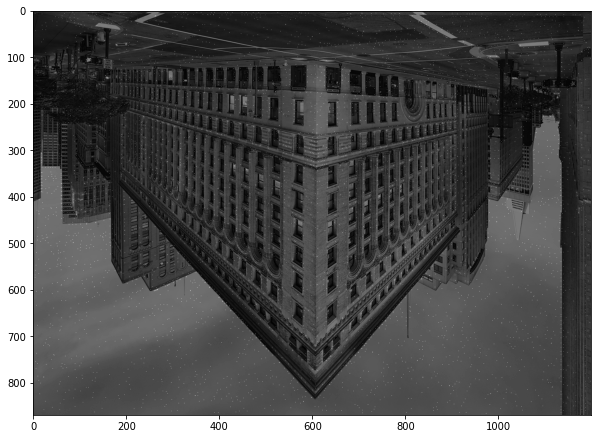

In [403]:
rotated_image_1=skimage.transform.rotate(image_1, 30)
rotated_image_2=skimage.transform.rotate(image_2, 30)
rotated_image_3=skimage.transform.rotate(image_1, 180)
rotated_image_4=skimage.transform.rotate(image_2, 180)

SIFT(rotated_image_1)
SIFT(rotated_image_2)
SIFT(rotated_image_3)
SIFT(rotated_image_4)


### **Upscale**

No.of features:  3020


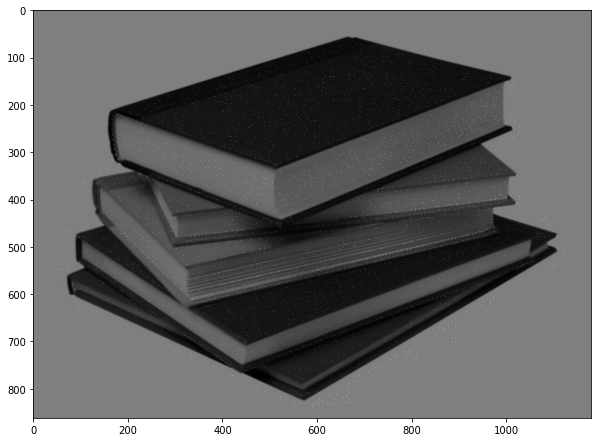

No.of features:  34315


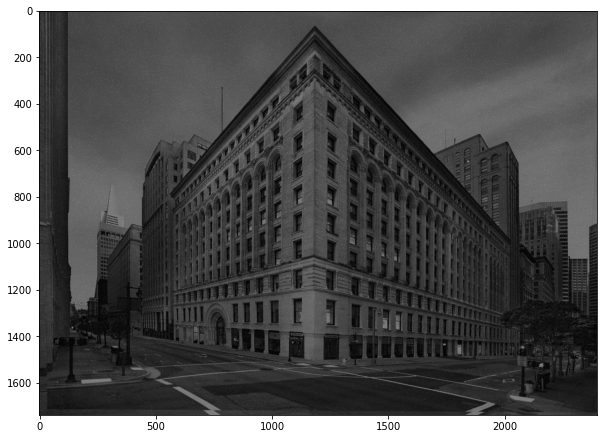

In [404]:
upscaled_image_1 = skimage.transform.rescale(image_1, 2, anti_aliasing=False)
upscaled_image_2= skimage.transform.rescale(image_2, 2, anti_aliasing=False)
SIFT(upscaled_image_1)
SIFT(upscaled_image_2)

### **DownScale**

No.of features:  401


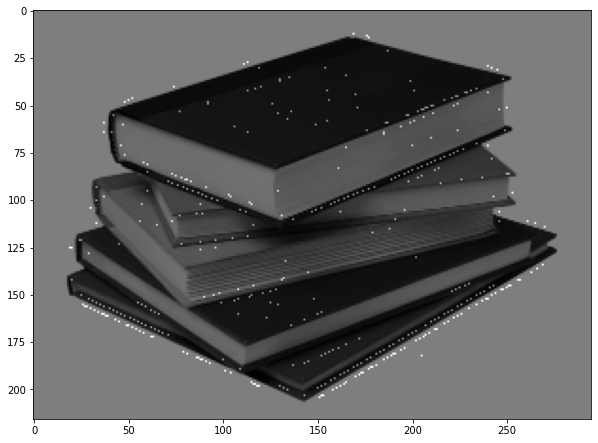

No.of features:  1572


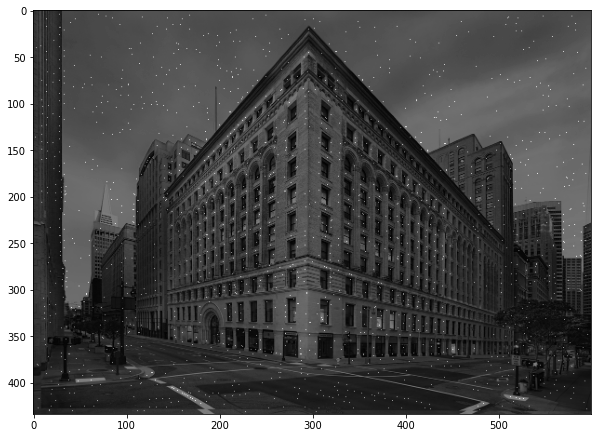

In [405]:
down_scaled_image_1 = skimage.transform.rescale(image_1, 0.5, anti_aliasing=False)
down_scaled_image_2 = skimage.transform.rescale(image_2, 0.5, anti_aliasing=False)
SIFT(down_scaled_image_1)
SIFT(down_scaled_image_2)

### **Gaussian Blur**

No.of features:  276


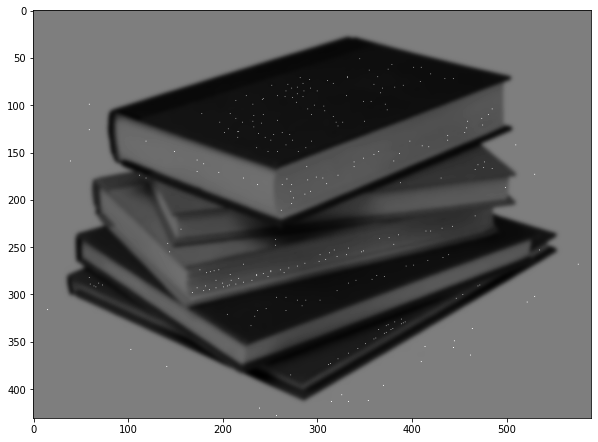

No.of features:  4560


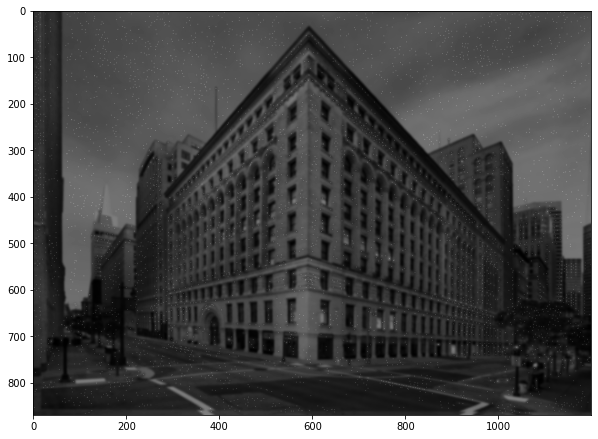

In [406]:
gauss_blurred_1 = scipy.ndimage.gaussian_filter(image_1, 2)
gauss_blurred_2 = scipy.ndimage.gaussian_filter(image_2, 2)
SIFT(gauss_blurred_1)
SIFT(gauss_blurred_2)


### **Gaussian Noise**

No.of features:  804


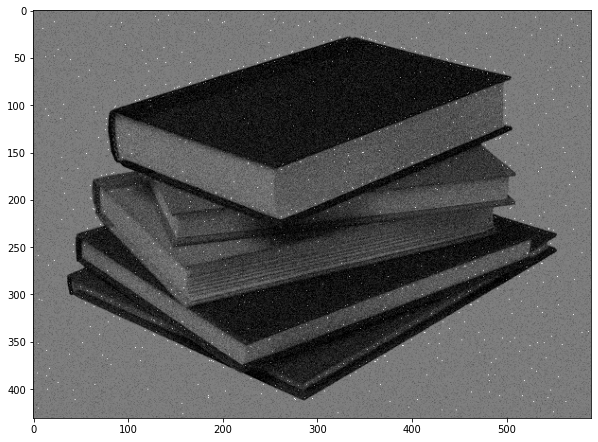

No.of features:  3678


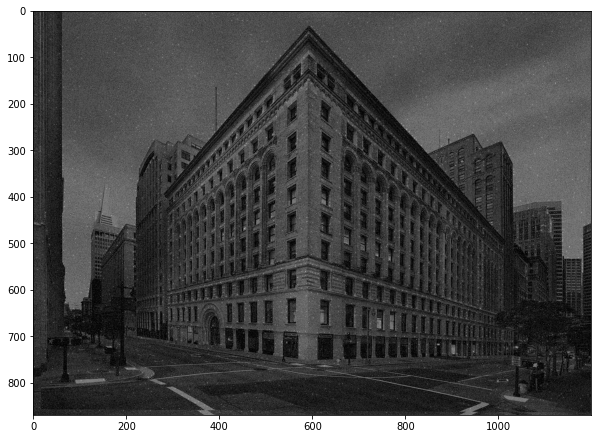

In [407]:
gauss_noise_1 = skimage.util.random_noise(image_1, mode='gaussian')
gauss_noise_2 = skimage.util.random_noise(image_2, mode='gaussian')
SIFT(gauss_noise_1)
SIFT(gauss_noise_2)